In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.formula.api import ols
import geopandas
import pycountry

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
products = pd.read_csv('dataset/final_dataset.csv')

In [5]:
products.drop(['price (USD)', 'Symbol'], axis=1, inplace=True)

In [6]:
exchange_rate = 0.012
products['actual_price'] = products['actual_price'] * exchange_rate
products['discount_price'] = products['discount_price'] * exchange_rate
products['discount_value'] = products['discount_value'] * exchange_rate
products.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent,brand,marketcap,country,revenue_ttm
0,0,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,413.880,813.48,399.600,0.491223,Carrier,40331792384,United States,21821000000
1,1,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51sTXvsanQ...,https://www.amazon.in/Carrier-Flexicool-Invert...,4.1,674.0,371.880,698.28,326.400,0.467434,Carrier,40331792384,United States,21821000000
2,2,Carrier 1.5 Ton 5 Star AI Flexicool Inverter S...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/61JtwWcAco...,https://www.amazon.in/Carrier-Flexicool-Conver...,4.0,568.0,503.988,941.88,437.892,0.464913,Carrier,40331792384,United States,21821000000
3,3,Carrier 1.5 Ton 3 Star Fixed Speed Window AC( ...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/717wB+IneG...,https://www.amazon.in/Carrier-Window-Copper-Di...,4.3,201.0,371.880,541.08,169.200,0.312708,Carrier,40331792384,United States,21821000000
4,4,Carrier 2 Ton 5 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/61JtwWcAco...,https://www.amazon.in/Carrier-Flexicool-Conver...,3.9,69.0,635.880,1100.28,464.400,0.422074,Carrier,40331792384,United States,21821000000


## Do pricing strategies differ for products for different genders?

In [7]:
gender_cat = ['men\'s shoes', 'women\'s shoes', 'men\'s clothing', 'women\'s clothing']
products_gender = products[products['main_category'].isin(gender_cat)]
products_gender['main_category'].value_counts()

main_category
men's shoes         4350
men's clothing      2124
women's clothing    1184
women's shoes        261
Name: count, dtype: int64

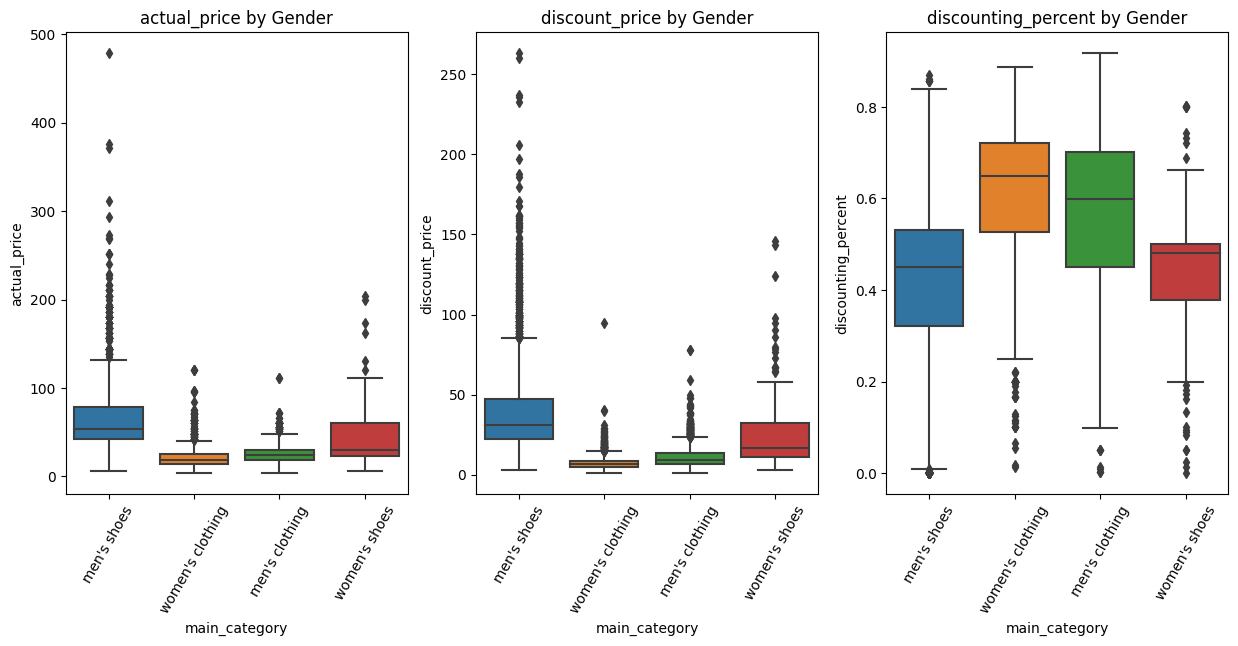

In [8]:
pricing_vars = ['actual_price', 'discount_price', 'discounting_percent']
plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='main_category', 
                y=pricing_vars[i], 
                data=products_gender).set_title(f'{pricing_vars[i]} by Gender')
    plt.xticks(rotation=60)
plt.show()

Text(0.5, 1.0, 'Distribution of Actual Price by Gender for Clothing')

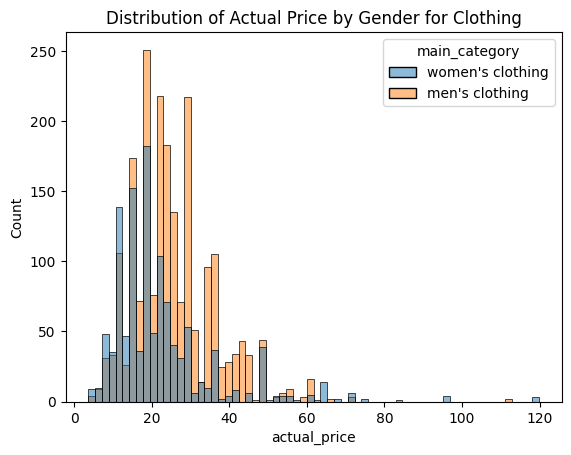

In [9]:
clothing = products_gender[products_gender['main_category'].str.contains("clothing")]
sns.histplot(data=clothing, 
             x='actual_price', 
             hue='main_category').set_title('Distribution of Actual Price by Gender for Clothing')

Text(0.5, 1.0, 'Distribution of Actual Price by Gender for Shoes')

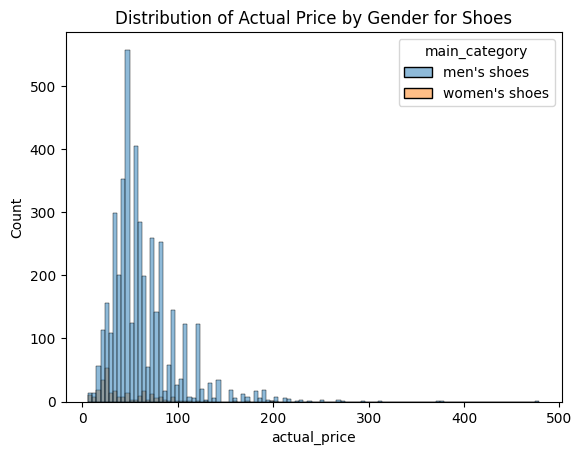

In [10]:
shoes = products_gender[products_gender['main_category'].str.contains("shoes")]
sns.histplot(data=shoes, 
             x='actual_price', 
             hue='main_category').set_title('Distribution of Actual Price by Gender for Shoes')

Above boxplots and histograms show that both clothing and shoes for men are higher in `actual_price` and `discount_price` than those for women, and there is no significant difference for the `discount_percentage`.

In [11]:
m_clothing = ols('actual_price ~ C(main_category)', data=clothing).fit()
m_clothing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           actual_price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     55.38
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.26e-13
Time:                        19:28:01   Log-Likelihood:                -12883.
No. Observations:                3308   AIC:                         2.577e+04
Df Residuals:                    3306   BIC:                         2.578e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               25.4044      0.258     98.453      0.000      24.898      25.910
C(main_category)[T.women's clothing]    -3.2096      0.431     -7.442      0.000      -4.055      -2.364
==============================================================================
Omnibus:                     1549.394   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12762.608
Skew:                           2.048   Prob(JB):                         0.00
Kurtosis:                      11.708   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value 1.26e-13 is below the critical value 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis and conclude that there is a statistically significant difference in `actual_price` for clothing of different genders.

In [12]:
m_shoes = ols('actual_price ~ C(main_category)', data=shoes).fit()
m_shoes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           actual_price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     85.64
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           3.22e-20
Time:                        19:28:01   Log-Likelihood:                -22926.
No. Observations:                4611   AIC:                         4.586e+04
Df Residuals:                    4609   BIC:                         4.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            63.5383      0.530    119.990      0.000      62.500      64.576
C(main_category)[T.women's shoes]   -20.5974      2.226     -9.254      0.000     -24.961     -16.234
==============================================================================
Omnibus:                     2474.120   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28873.982
Skew:                           2.312   Prob(JB):                         0.00
Kurtosis:                      14.353   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value 3.22e-20 is below the critical value 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis and conclude that there is a statistically significant difference in `actual_price` for shoes of different genders.

## Is there a relationship between the size of a brand and its pricing?

Text(0.5, 1.0, 'Correlation Matrix of Pricing and Financial Variables')

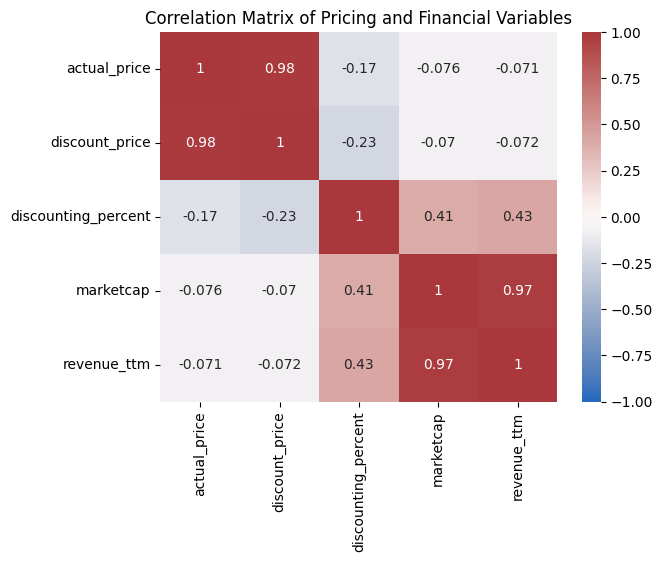

In [13]:
sns.heatmap(products[['actual_price', 'discount_price', 'discounting_percent', 'marketcap', 'revenue_ttm']].corr(), 
            annot=True, cmap='vlag', vmin=-1, vmax=1).set_title('Correlation Matrix of Pricing and Financial Variables')

The heatmap indicates that there is a slight positive relationship between `discounting_percent` and `revenue_ttm`, with a correlation of 0.43. While there is also a slight positive relationship between `discounting_percent` and `markecap`, with a correlation of 0.41, since `marketcap` and `revenue_ttm` are highly correlated with a correlation of 0.97, we will not consider `marketcap` and mainly focus on `revenue_ttm` in the following analysis.

Text(0.5, 1.0, 'Revenue vs Discounting Percent')

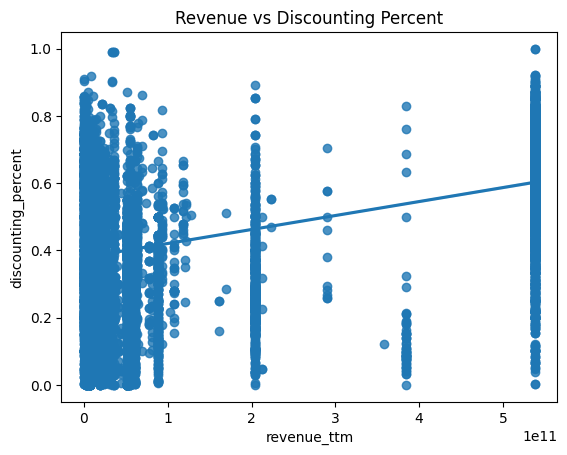

In [14]:
sns.regplot(x='revenue_ttm', y='discounting_percent', data=products).set_title('Revenue vs Discounting Percent')

The regression plot also shows that there is a slight positive relationship between `discounting_percent` and `revenue_ttm`.

In [15]:
m_revenue_discount = ols('discounting_percent ~ revenue_ttm', data=products).fit()
m_revenue_discount.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     discounting_percent   R-squared:                       0.182
Model:                             OLS   Adj. R-squared:                  0.182
Method:                  Least Squares   F-statistic:                     4079.
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         19:28:05   Log-Likelihood:                 5454.8
No. Observations:                18390   AIC:                        -1.091e+04
Df Residuals:                    18388   BIC:                        -1.089e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3790      0.002    245.264      0.000       0.376       0.382
revenue_ttm  4.156e-13   6.51e-15     63.865      0.000    4.03e-13    4.28e-13
==============================================================================
Omnibus:                      373.689   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.372
Skew:                          -0.241   Prob(JB):                     1.33e-66
Kurtosis:                       2.595   Cond. No.                     2.77e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value 0.00 is below the critical value 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis and conclude that there is a statistically significant relationship between `discounting_percent` and `revenue_ttm`.

## Are there differences for the discount strategy among countries?

Text(0.5, 1.0, 'Discounting Percent by Country')

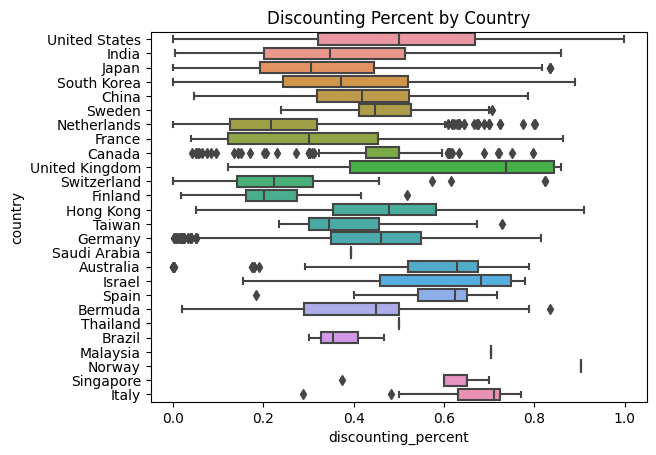

In [16]:
sns.boxplot(x='discounting_percent', y='country', data=products).set_title('Discounting Percent by Country')

(0.0, 3000.0)

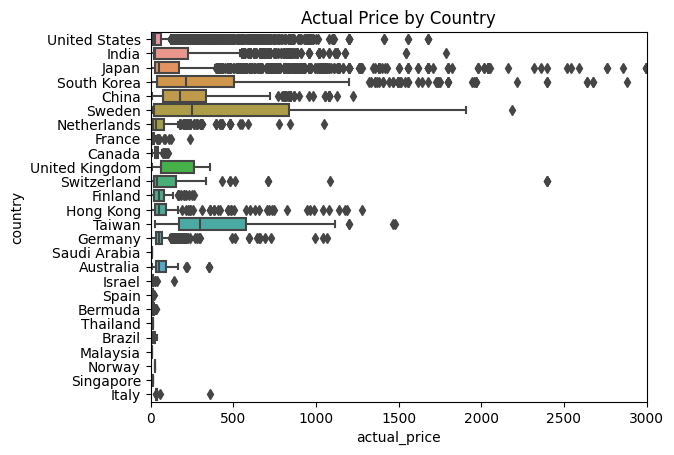

In [17]:
sns.boxplot(x='actual_price', y='country', data=products).set_title('Actual Price by Country')
plt.xlim(0, 3000)

The boxplot above shows that there are differences in `discounting_percent` and `actual_price` by country. Also, the boxplot of Malaysia and of Norway are concentrated in one dot, so we will investigate it through digging into the original data.

In [18]:
products[products['country'] == 'Norway']

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent,brand,marketcap,country,revenue_ttm
18198,18198,OPERA SPARK INDIA:- Afghani Oxidised Silver Je...,accessories,Fashion & Silver Jewellery,https://m.media-amazon.com/images/I/61rkOqe1oe...,https://www.amazon.in/OPERA-SPARK-INDIA-Oxidis...,2.5,2.0,2.532,26.4,23.868,0.904091,Opera,985555712,Norway,362804000


In [19]:
products[products['country'] == 'Malaysia']

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent,brand,marketcap,country,revenue_ttm
18187,18187,sunway M3 Silicone LED Digital Black Men's Wom...,accessories,Fashion & Silver Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/sunway-Silicone-Digital-...,2.8,332.0,1.776,5.988,4.212,0.703407,Sunway,1973697572,Malaysia,1222637219
18188,18188,sunway M3 Silicone LED Digital Black Men's Wom...,stores,Men's Fashion,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/sunway-Silicone-Digital-...,2.8,332.0,1.776,5.988,4.212,0.703407,Sunway,1973697572,Malaysia,1222637219


There is only two products for Malaysia and one product for Norway, so we will remove these products in the hypothesis testing to avoid data bias.

In [20]:
# Data preparation for choropleth map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [21]:
# Add country country code to products dataset for mapping
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3

iso_map = {country: do_fuzzy_search(country) for country in products['country'].unique()}
products['country_code'] = products['country'].map(iso_map)
products.head()
# Reference: https://codereview.stackexchange.com/questions/238714/basic-function-to-convert-country-name-to-iso-code-using-pycountry

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent,brand,marketcap,country,revenue_ttm,country_code
0,0,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,413.880,813.48,399.600,0.491223,Carrier,40331792384,United States,21821000000,USA
1,1,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51sTXvsanQ...,https://www.amazon.in/Carrier-Flexicool-Invert...,4.1,674.0,371.880,698.28,326.400,0.467434,Carrier,40331792384,United States,21821000000,USA
2,2,Carrier 1.5 Ton 5 Star AI Flexicool Inverter S...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/61JtwWcAco...,https://www.amazon.in/Carrier-Flexicool-Conver...,4.0,568.0,503.988,941.88,437.892,0.464913,Carrier,40331792384,United States,21821000000,USA
3,3,Carrier 1.5 Ton 3 Star Fixed Speed Window AC( ...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/717wB+IneG...,https://www.amazon.in/Carrier-Window-Copper-Di...,4.3,201.0,371.880,541.08,169.200,0.312708,Carrier,40331792384,United States,21821000000,USA
4,4,Carrier 2 Ton 5 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/61JtwWcAco...,https://www.amazon.in/Carrier-Flexicool-Conver...,3.9,69.0,635.880,1100.28,464.400,0.422074,Carrier,40331792384,United States,21821000000,USA


In [22]:
# Group by country code and calculate median discounting percent and actual price
discount_country = products.groupby('country_code')[['discounting_percent', 'actual_price']].median()
discount_country = discount_country.reset_index()
discount_country

,country_code,discounting_percent,actual_price
0,AUS,0.628650,47.880
1,BMU,0.450281,16.788
2,BRA,0.353149,20.388
3,CAN,0.500000,34.680
4,CHE,0.222778,41.334
5,CHN,0.418530,180.000
6,DEU,0.460413,47.988
7,ESP,0.625391,13.200
8,FIN,0.200118,51.588
9,FRA,0.300351,9.282


In [23]:
# Merge products and world dataset for Choropleth map
products_geo = pd.merge(world, discount_country, left_on='iso_a3', right_on='country_code', how='left')
products_geo['discounting_percent'] = products_geo['discounting_percent'].fillna(0)
products_geo['actual_price'] = products_geo['actual_price'].fillna(0)

Text(0.5, 1.0, 'Median of Discounting Percent by Country')

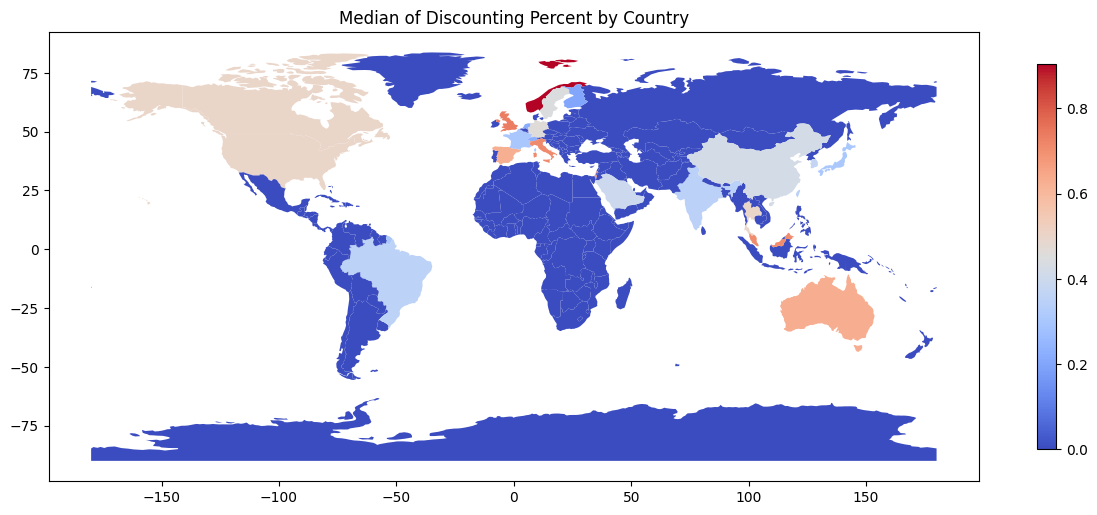

In [24]:
# Plot Choropleth map for median discounting percent by country
products_geo.plot(column='discounting_percent', 
                  cmap='coolwarm', 
                  legend=True, 
                  legend_kwds={"shrink": 0.5}, 
                  figsize=(15, 10))
plt.title('Median of Discounting Percent by Country')

Text(0.5, 1.0, 'Median of Actual Price by Country')

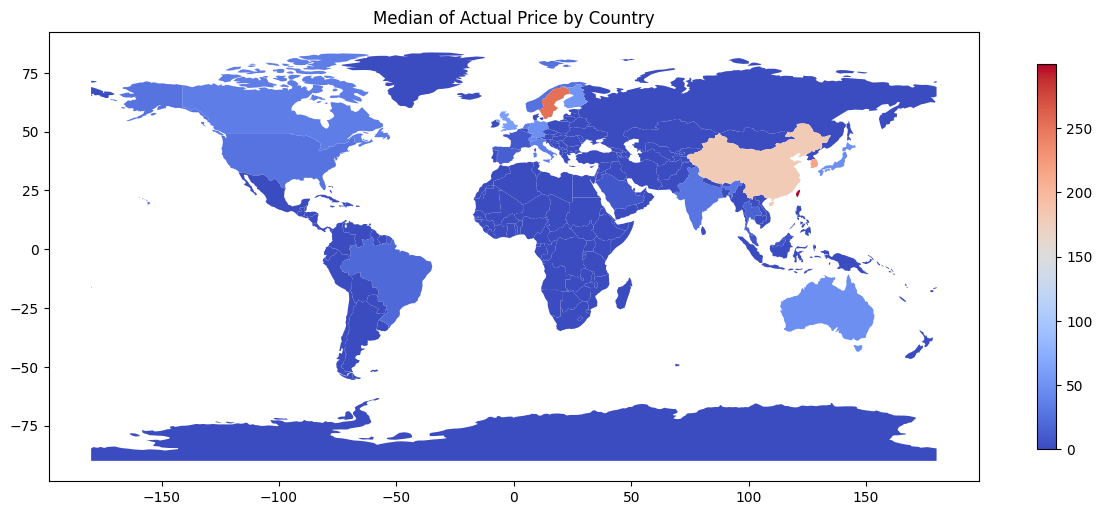

In [25]:
# Plot Choropleth map for median actual price by country
products_geo.plot(column='actual_price', 
                  cmap='coolwarm', 
                  legend=True, 
                  legend_kwds={"shrink": 0.5}, 
                  figsize=(15, 10))
plt.title('Median of Actual Price by Country')

In [26]:
# Drop products with brands in Norway and Malaysia from products dataset
products_xNOR_xMYS = products.drop([18187, 18188, 18198])

In [27]:
# Conduct hypothesis test for discounting percent by country
m_discount_country = ols('discounting_percent ~ C(country)', data=products_xNOR_xMYS).fit()
m_discount_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     discounting_percent   R-squared:                       0.106
Model:                             OLS   Adj. R-squared:                  0.105
Method:                  Least Squares   F-statistic:                     94.89
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         19:28:11   Log-Likelihood:                 4647.8
No. Observations:                18387   AIC:                            -9248.
Df Residuals:                    18363   BIC:                            -9060.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.5594      0.021     27.266      0.000       0.519       0.600
C(country)[T.Bermuda]           -0.1490      0.031     -4.731      0.000      -0.211      -0.087
C(country)[T.Brazil]            -0.1859      0.110     -1.683      0.092      -0.402       0.031
C(country)[T.Canada]            -0.0986      0.023     -4.301      0.000      -0.143      -0.054
C(country)[T.China]             -0.1386      0.022     -6.288      0.000      -0.182      -0.095
C(country)[T.Finland]           -0.3423      0.032    -10.716      0.000      -0.405      -0.280
C(country)[T.France]            -0.2393      0.032     -7.455      0.000      -0.302      -0.176
C(country)[T.Germany]           -0.1130      0.021     -5.463      0.000      -0.154      -0.072
C(country)[T.Hong Kong]         -0.1050      0.023     -4.514      0.000      -0.151      -0.059
C(country)[T.India]             -0.2069      0.021     -9.710      0.000      -0.249      -0.165
C(country)[T.Israel]             0.0197      0.040      0.492      0.623      -0.059       0.098
C(country)[T.Italy]              0.0875      0.050      1.749      0.080      -0.011       0.185
C(country)[T.Japan]             -0.2239      0.021    -10.715      0.000      -0.265      -0.183
C(country)[T.Netherlands]       -0.3125      0.022    -14.134      0.000      -0.356      -0.269
C(country)[T.Saudi Arabia]      -0.1654      0.189     -0.875      0.382      -0.536       0.205
C(country)[T.Singapore]          0.0360      0.087      0.416      0.678      -0.134       0.206
C(country)[T.South Korea]       -0.1774      0.021     -8.296      0.000      -0.219      -0.136
C(country)[T.Spain]              0.0009      0.060      0.016      0.988      -0.117       0.119
C(country)[T.Sweden]            -0.0899      0.036     -2.487      0.013      -0.161      -0.019
C(country)[T.Switzerland]       -0.3083      0.028    -11.126      0.000      -0.363      -0.254
C(country)[T.Taiwan]            -0.1696      0.029     -5.811      0.000      -0.227      -0.112
C(country)[T.Thailand]          -0.0594      0.135     -0.442      0.659      -0.323       0.204
C(country)[T.United Kingdom]     0.0761      0.045      1.690      0.091      -0.012       0.164
C(country)[T.United States]     -0.0779      0.021     -3.775      0.000      -0.118      -0.037
==============================================================================
Omnibus:                      201.839   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.260
Skew:                          -0.203   Prob(JB):                     9.74e-41
Kurtosis:                       2.726   Cond. No.                         153.
==========================================================

The p-value 0.00 is below the critical value 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis and conclude that there is a statistically significant difference in `discounting_percent` for brands from different countries. In addition, the coefficients of Finland (-0.3423) and Switzerland (-0.3083) indicate that brands of these two countries tend to have much smaller discounting_percent.

In [28]:
# Conduct hypothesis test for actual price by country
m_price_country = ols('actual_price ~ C(country)', data=products_xNOR_xMYS).fit()
m_price_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           actual_price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     89.27
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:28:12   Log-Likelihood:            -1.3048e+05
No. Observations:               18387   AIC:                         2.610e+05
Df Residuals:                   18363   BIC:                         2.612e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       75.1722     31.906      2.356      0.018      12.633     137.712
C(country)[T.Bermuda]          -57.2402     48.962     -1.169      0.242    -153.210      38.730
C(country)[T.Brazil]           -54.3842    171.821     -0.317      0.752    -391.170     282.401
C(country)[T.Canada]           -40.1630     35.641     -1.127      0.260    -110.022      29.696
C(country)[T.China]            184.1450     34.281      5.372      0.000     116.950     251.340
C(country)[T.Finland]           -4.2051     49.673     -0.085      0.933    -101.569      93.158
C(country)[T.France]           -52.7306     49.924     -1.056      0.291    -150.586      45.125
C(country)[T.Germany]          -20.3584     32.172     -0.633      0.527     -83.419      42.702
C(country)[T.Hong Kong]         48.1855     36.165      1.332      0.183     -22.701     119.072
C(country)[T.India]            102.9476     33.126      3.108      0.002      38.017     167.878
C(country)[T.Israel]           -58.5434     62.197     -0.941      0.347    -180.455      63.368
C(country)[T.Italy]            -19.7019     77.770     -0.253      0.800    -172.139     132.735
C(country)[T.Japan]            162.7484     32.495      5.008      0.000      99.055     226.442
C(country)[T.Netherlands]        0.4733     34.382      0.014      0.989     -66.919      67.866
C(country)[T.Saudi Arabia]     -67.9842    294.162     -0.231      0.817    -644.570     508.601
C(country)[T.Singapore]        -63.1842    134.613     -0.469      0.639    -327.039     200.670
C(country)[T.South Korea]      319.1058     33.261      9.594      0.000     253.912     384.300
C(country)[T.Spain]            -62.1981     93.765     -0.663      0.507    -245.987     121.591
C(country)[T.Sweden]           457.9725     56.177      8.152      0.000     347.860     568.085
C(country)[T.Switzerland]      101.1900     43.086      2.349      0.019      16.738     185.642
C(country)[T.Taiwan]           341.0491     45.397      7.513      0.000     252.067     430.031
C(country)[T.Thailand]         -59.5962    209.224     -0.285      0.776    -469.695     350.502
C(country)[T.United Kingdom]    53.6767     70.036      0.766      0.443     -83.600     190.953
C(country)[T.United States]     -3.4325     32.103     -0.107      0.915     -66.358      59.493
==============================================================================
Omnibus:                    40745.873   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        776291395.700
Skew:                          19.987   Prob(JB):                         0.00
Kurtosis:                    1008.819   Cond. No.                         153.
=====================================================================

The p-value 0.00 is below the critical value 0.05, so we can reject the null hypothesis in favor of the alternative hypothesis and conclude that there is a statistically significant difference in `actual_price` for brands from different countries. In addition, the coefficients of Sweden (457.9725) and Taiwan (341.0491) indicate that brands of these two countries tend to have higher prices for their products.